In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
#from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport
import sweetviz as sv

In [225]:
import sys
print(sys.executable)

/Users/farhana/anaconda3/envs/project1_churn_env/bin/python


In [226]:
#Loading the dataset
df = pd.read_csv(r"/Users/farhana/Downloads/Introduction to Data Science/Class Lectures/Projects/Project 1/telco-customer-churn.csv")

In [227]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [228]:
df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [229]:
# Summary of the dataset to understand the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [230]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [231]:
#converting TotalCharges to numeric value
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].dtypes)

float64


In [232]:
# Descriptive statistics of the data frame (Numeric feature)
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [233]:
df.shape

(7043, 21)

In [234]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [235]:
#handling missing vales in TotalCharges
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [236]:
# Looking for unique values in each feature
for col in df.columns:
    print(f"Column: {col}, Unique Values: {df[col].nunique()}")

Column: customerID, Unique Values: 7043
Column: gender, Unique Values: 2
Column: SeniorCitizen, Unique Values: 2
Column: Partner, Unique Values: 2
Column: Dependents, Unique Values: 2
Column: tenure, Unique Values: 73
Column: PhoneService, Unique Values: 2
Column: MultipleLines, Unique Values: 3
Column: InternetService, Unique Values: 3
Column: OnlineSecurity, Unique Values: 3
Column: OnlineBackup, Unique Values: 3
Column: DeviceProtection, Unique Values: 3
Column: TechSupport, Unique Values: 3
Column: StreamingTV, Unique Values: 3
Column: StreamingMovies, Unique Values: 3
Column: Contract, Unique Values: 3
Column: PaperlessBilling, Unique Values: 2
Column: PaymentMethod, Unique Values: 4
Column: MonthlyCharges, Unique Values: 1585
Column: TotalCharges, Unique Values: 6531
Column: Churn, Unique Values: 2


In [237]:
# Converting the categorical feature to numeric feature 

# Convert binary categorical features using Label Encoding
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
               'StreamingMovies', 'PaperlessBilling', 'InternetService', 'Contract', 'Churn']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'No internet service' : 0, 'No phone service' : 0, 'DSL': 1, 'Fiber optic': 1, 'One year': 1, 'Two year': 1, 'Month-to-month': 0 })

# Convert multicategorical features using One-Hot Encoding
multicategorical_cols = ['PaymentMethod']

df = pd.get_dummies(df, columns=multicategorical_cols, drop_first=False)
df.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              0                1               0  ...   
1             1              0                1               1  ...   
2             1              0                1               1  ...   
3             0              0                1               1  ...   
4             1              0                1               0  ...   

   StreamingMovies  Contract  PaperlessBilling  MonthlyCharges  TotalCharges  \
0                0         0                 1           29.85         29.85   
1                0         1                 0           56.95       1889.50   
2                0         0                 1           53.85        108.15   
3                0         1                 0           42.30       1840.75   
4                0         0                 1           70.70        151.65   

   Churn  PaymentMethod_Bank transfer (automatic)  \
0      0                                    False   
1      0                                    False   
2      1                                    False   
3      0                                     True   
4      1                                    False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 24 columns]

In [238]:
df.isnull().sum()

customerID                                 0
gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
InternetService                            0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
Contract                                   0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMet

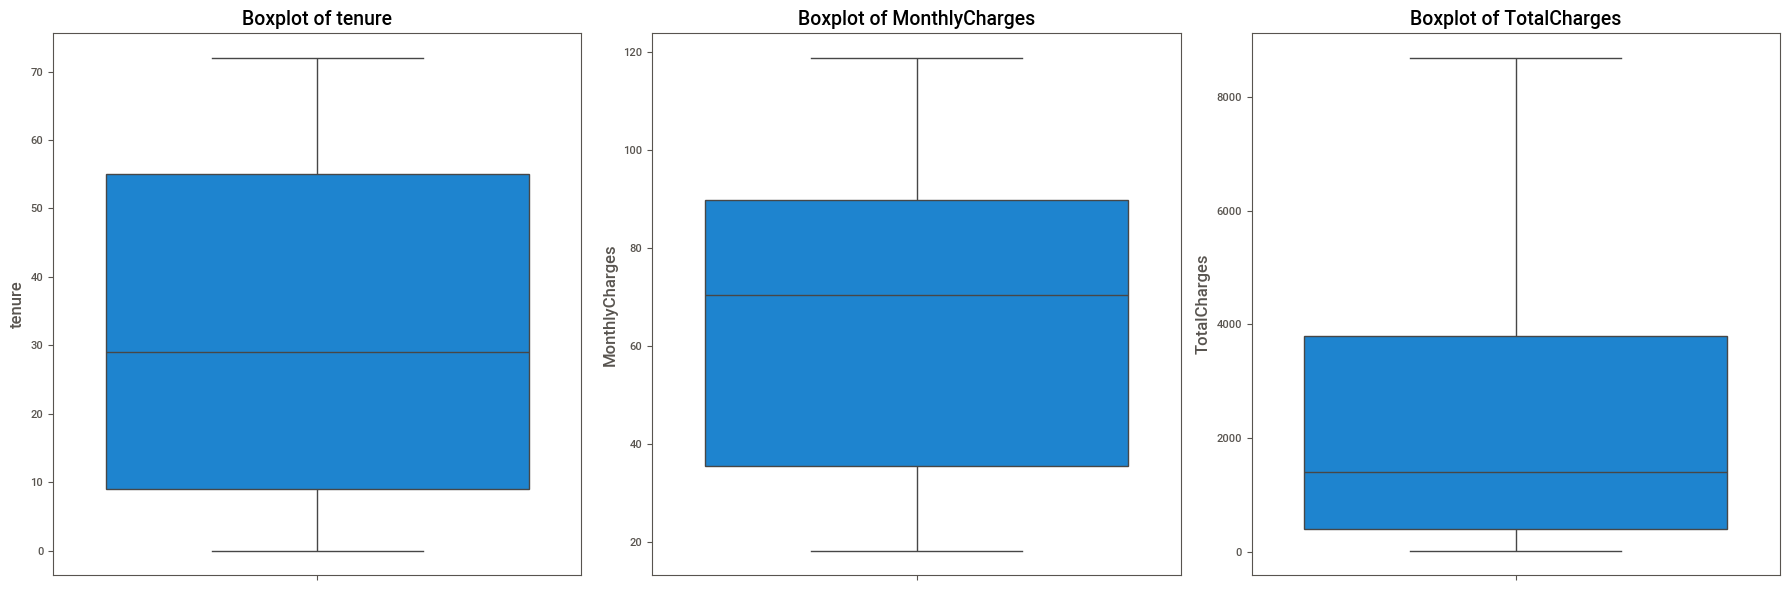

In [239]:
# boxplot of the numerical column for checking the outliers
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()

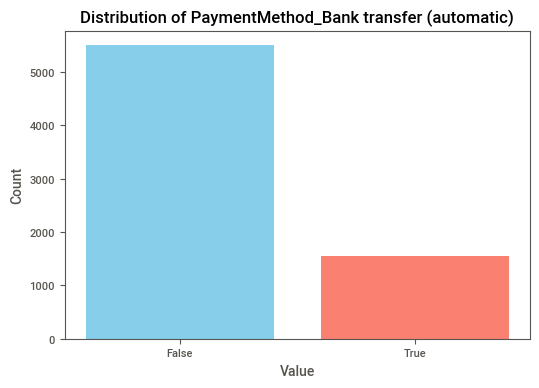

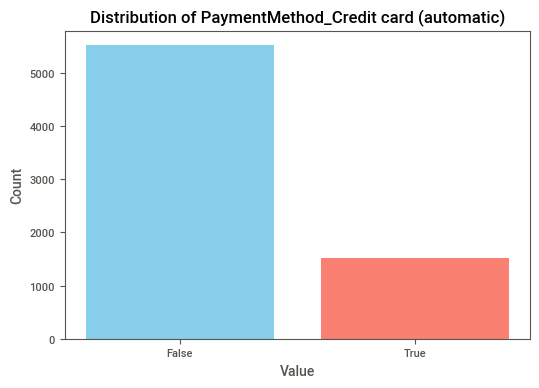

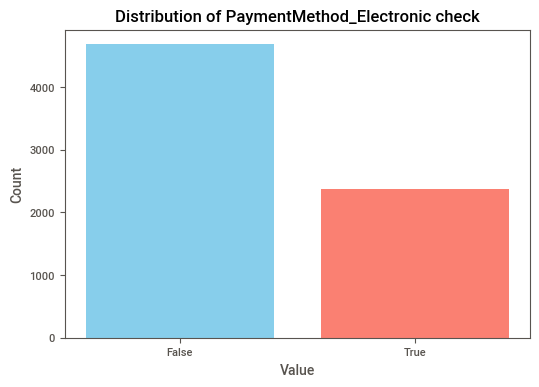

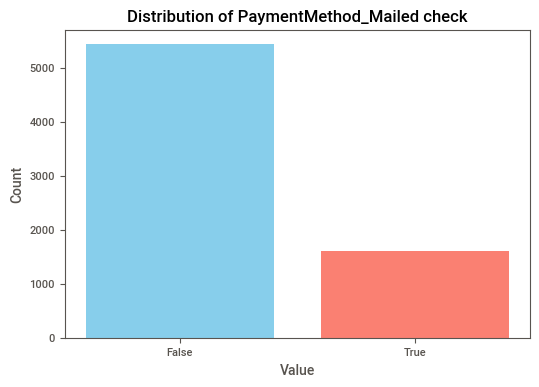

In [240]:
# the distribution of one-hot encoded features
bool_cols = df.select_dtypes(include = 'bool').columns
# Create bar plots for each boolean column
for col in bool_cols:
    counts = df[col].value_counts()
    
        
    plt.figure(figsize=(6, 4))
    plt.bar(counts.index.astype(str), counts.values, color=['skyblue', 'salmon'])
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.xlabel('Value')
    plt.xticks(ticks=range(len(counts.index)), labels=counts.index.astype(str), rotation=0)
    plt.show()

In [241]:
# Combining Bank Transfer and Credit Card into 'AutomaticTransfer' and Electronic check, Mailed check into CheckTransfer
df.loc[:, 'AutomaticTransfer'] = df['PaymentMethod_Bank transfer (automatic)'] | df['PaymentMethod_Credit card (automatic)']

df.loc[:, 'CheckTransfer'] = df['PaymentMethod_Electronic check'] | df['PaymentMethod_Mailed check']

df.drop(columns=['PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 
                         'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'], inplace=True)
df.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              0                1               0  ...   
1             1              0                1               1  ...   
2             1              0                1               1  ...   
3             0              0                1               1  ...   
4             1              0                1               0  ...   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0            0                0         0                 1   
1            0            0                0         1                 0   
2            0            0                0         0                 1   
3            1            0                0         1                 0   
4            0            0                0         0                 1   

   MonthlyCharges  TotalCharges  Churn  AutomaticTransfer  CheckTransfer  
0           29.85         29.85      0              False           True  
1           56.95       1889.50      0              False           True  
2           53.85        108.15      1              False           True  
3           42.30       1840.75      0               True          False  
4           70.70        151.65      1              False           True  

[5 rows x 22 columns]

In [242]:
# checking all data types if they are numeric or not
print(df.dtypes)

customerID            object
gender                 int64
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines          int64
InternetService        int64
OnlineSecurity         int64
OnlineBackup           int64
DeviceProtection       int64
TechSupport            int64
StreamingTV            int64
StreamingMovies        int64
Contract               int64
PaperlessBilling       int64
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
AutomaticTransfer       bool
CheckTransfer           bool
dtype: object


In [243]:
# Dropping customerID as it is an identifier 
df = df.drop(columns=['customerID'])

In [244]:
# duplicate rows handling
duplicate_rows = df.duplicated()

print(f"Number of duplicate rows: {duplicate_rows.sum()}")
df.drop_duplicates()

df_cleaned = df.drop_duplicates()

print(f"Original number of rows: {df.shape[0]}")
print(f"Number of rows after dropping duplicates: {df_cleaned.shape[0]}")

Number of duplicate rows: 26
Original number of rows: 7043
Number of rows after dropping duplicates: 7017


In [245]:
# Listing numeric and categorical columns
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')
Categorical Columns: Index([], dtype='object')


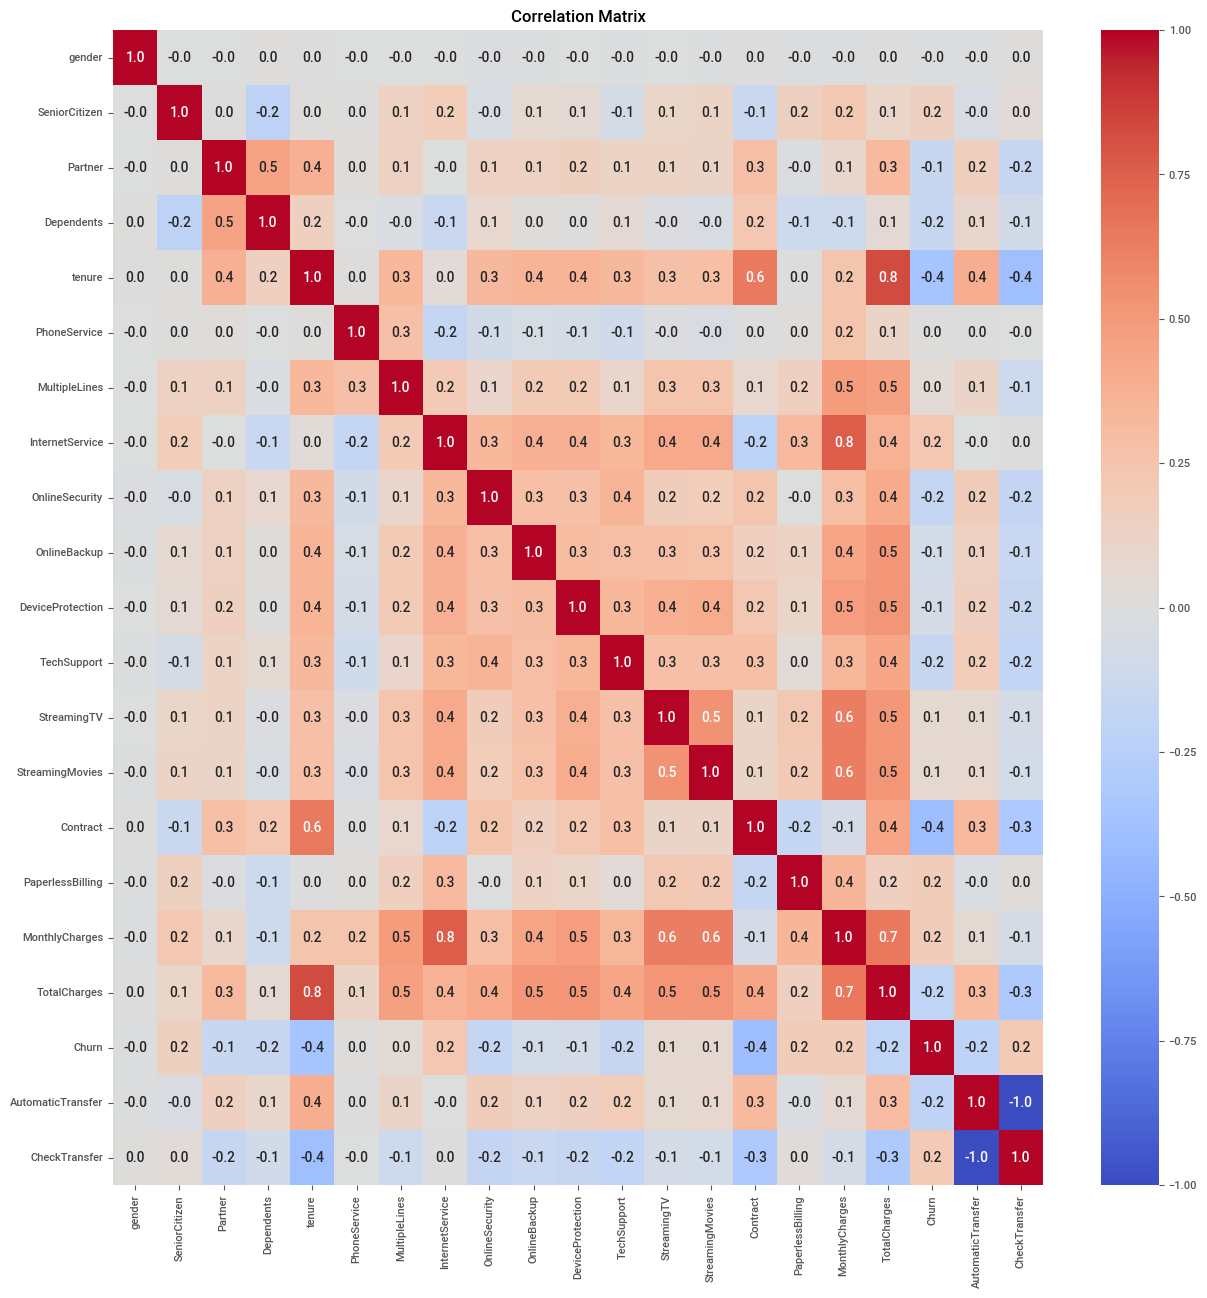

In [246]:
# Correlation matrix
corr = df_cleaned.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix')
plt.show()

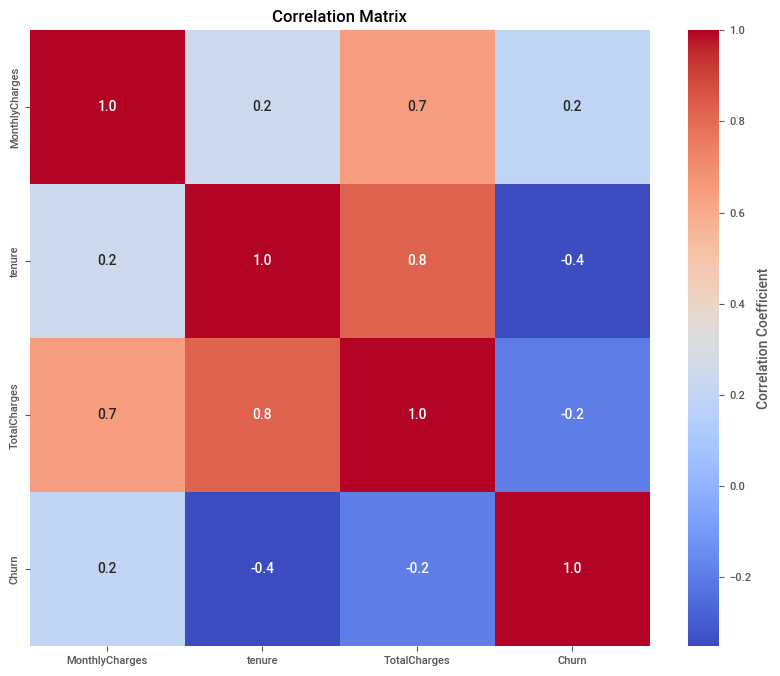

In [247]:
# Selecting only the numeric columns to better understand the relationship 
numeric_cols = ['MonthlyCharges', 'tenure', 'TotalCharges', 'Churn']

corr = df_cleaned[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix')
plt.show()

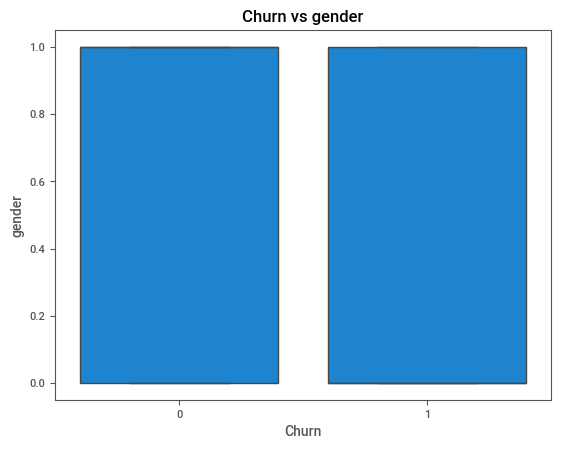

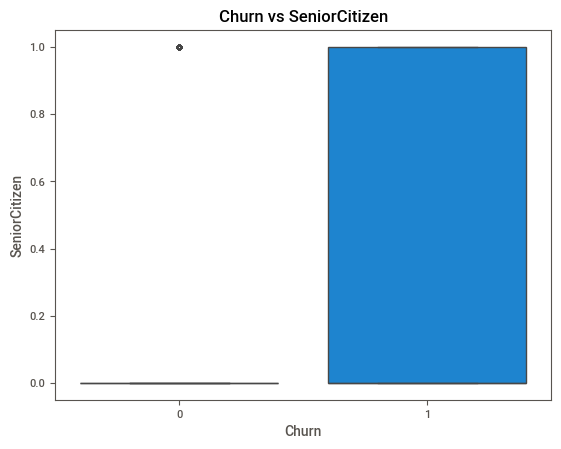

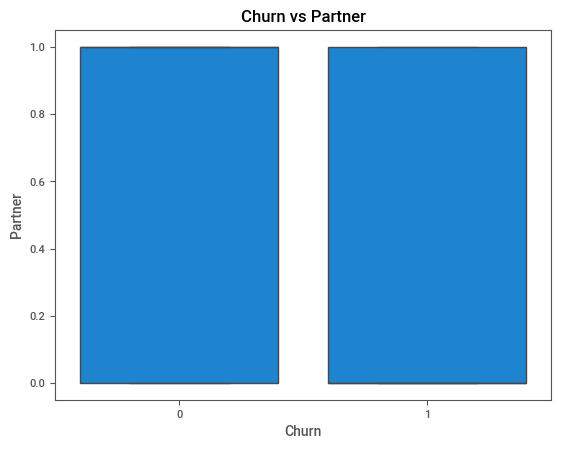

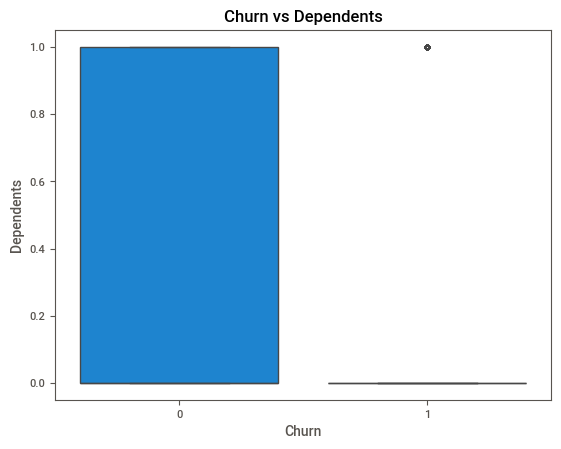

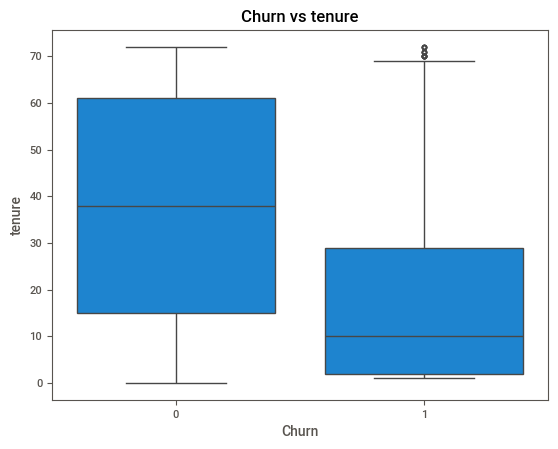

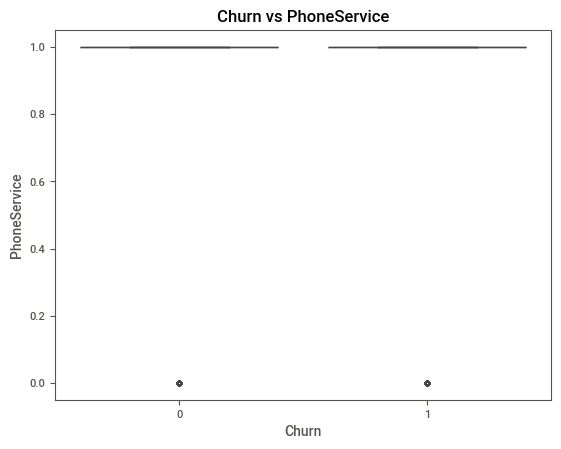

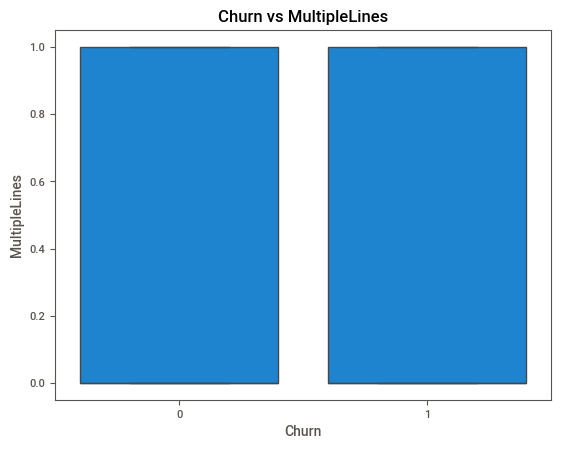

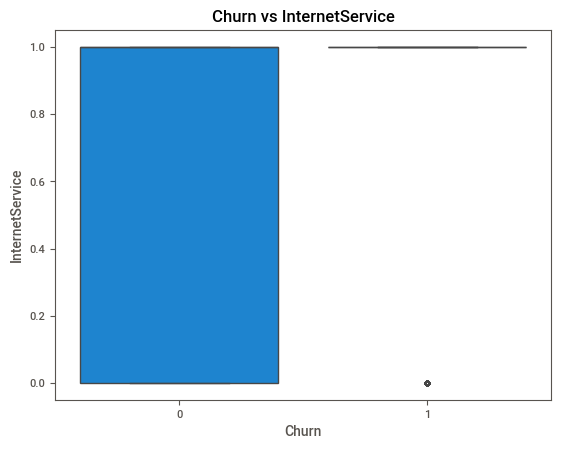

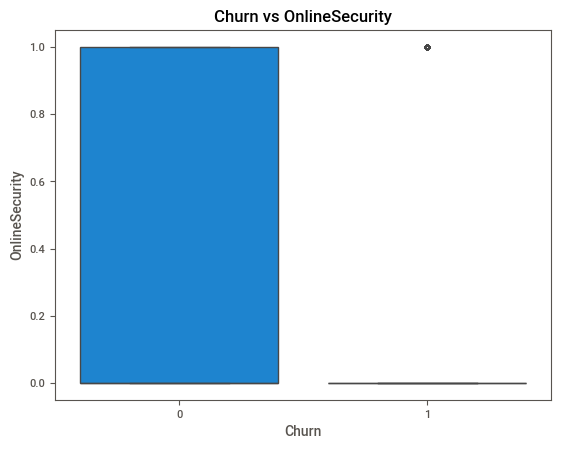

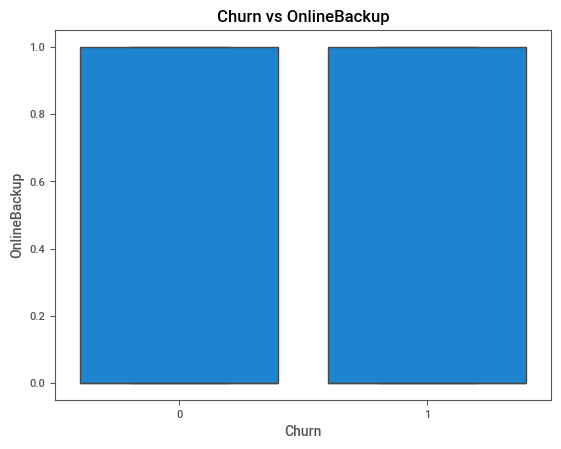

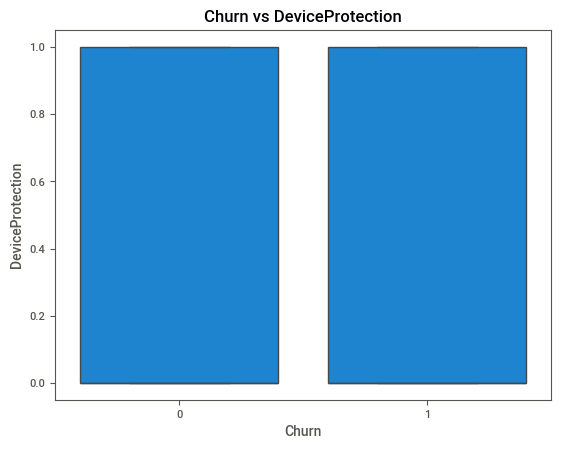

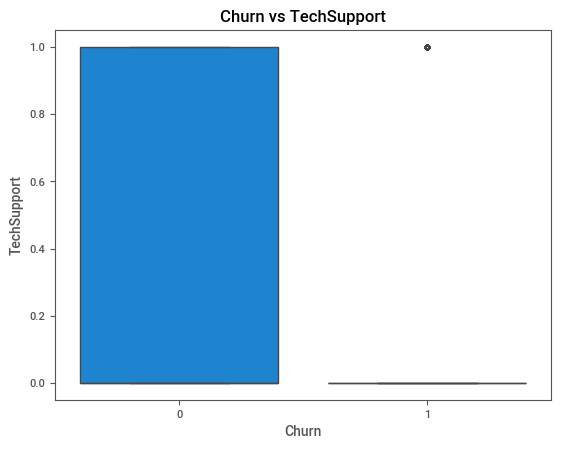

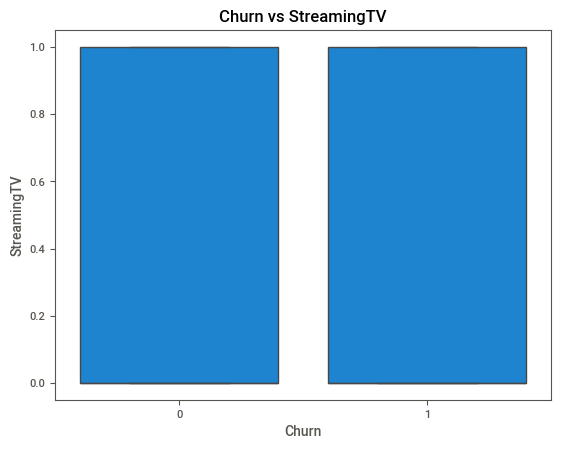

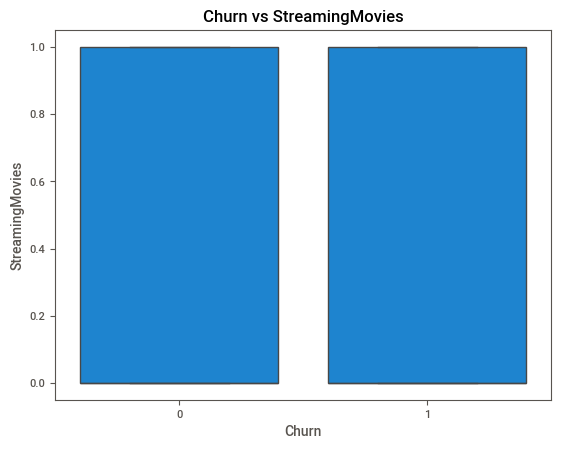

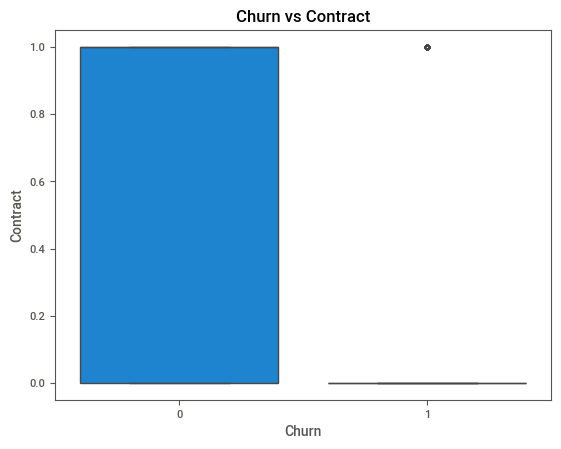

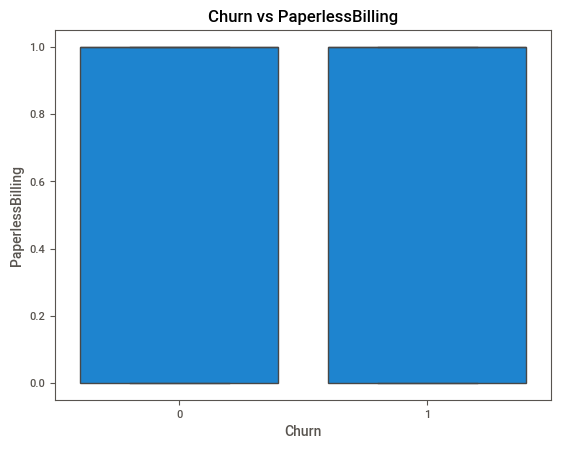

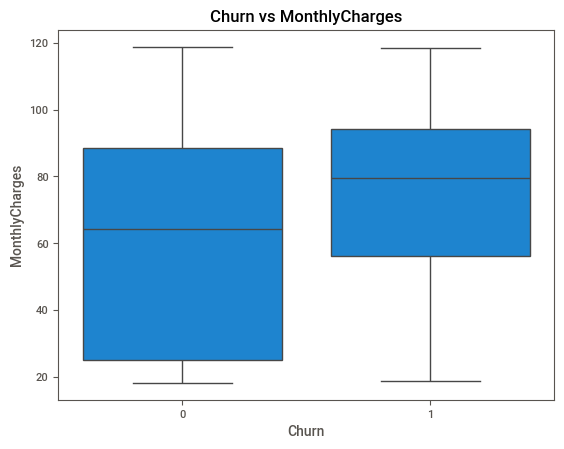

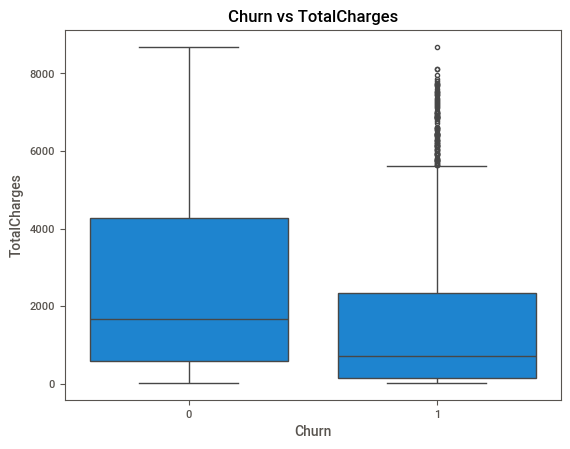

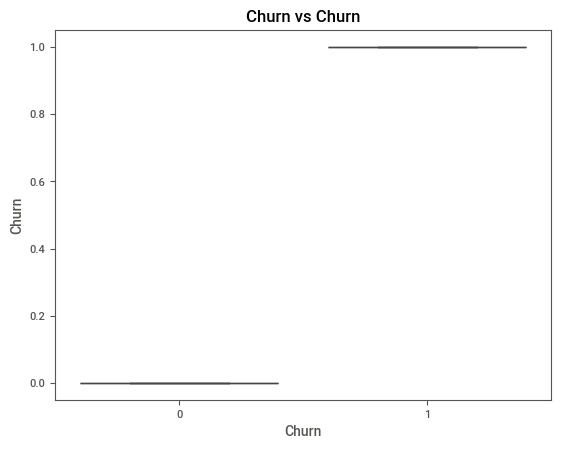

In [248]:
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"Churn vs {col}")
    plt.show()

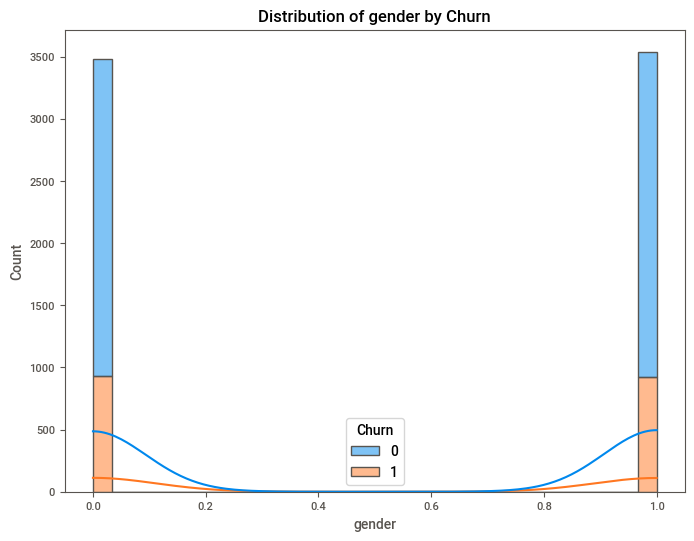

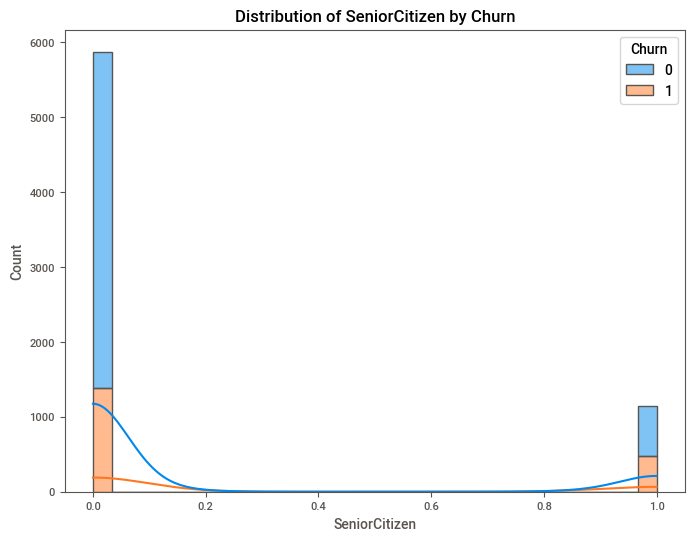

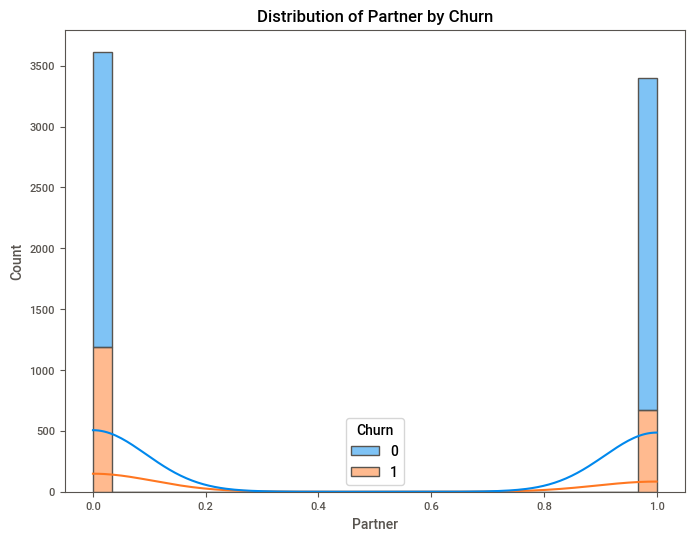

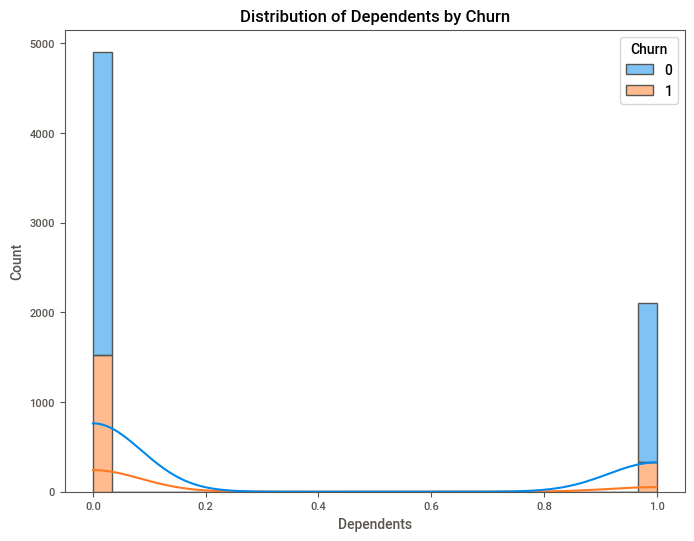

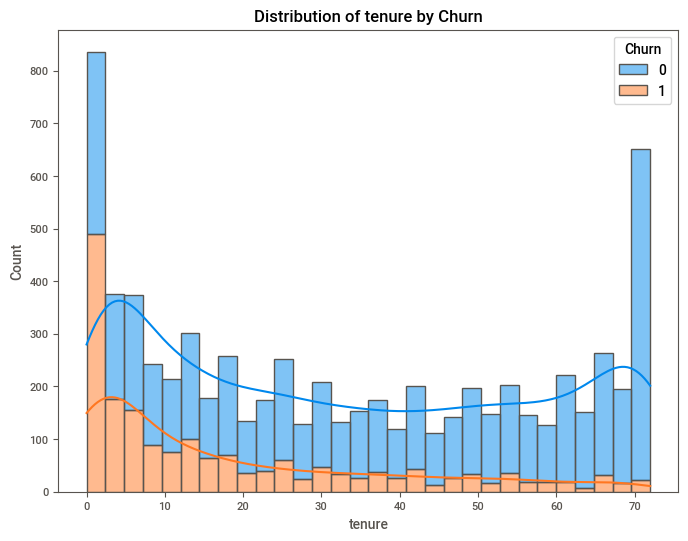

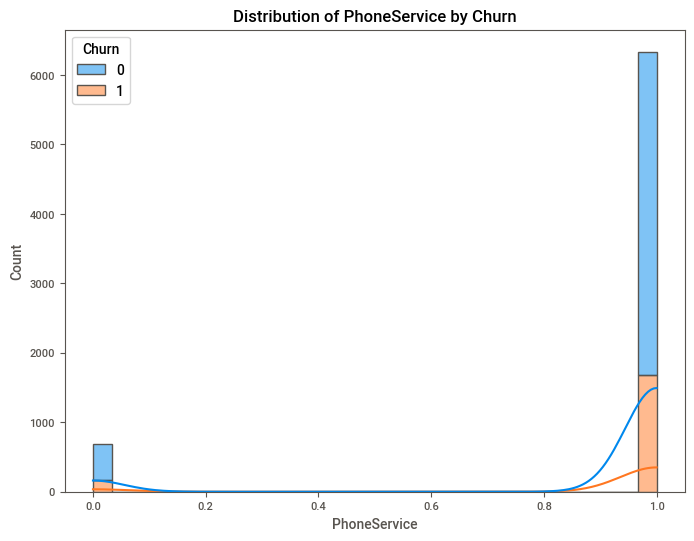

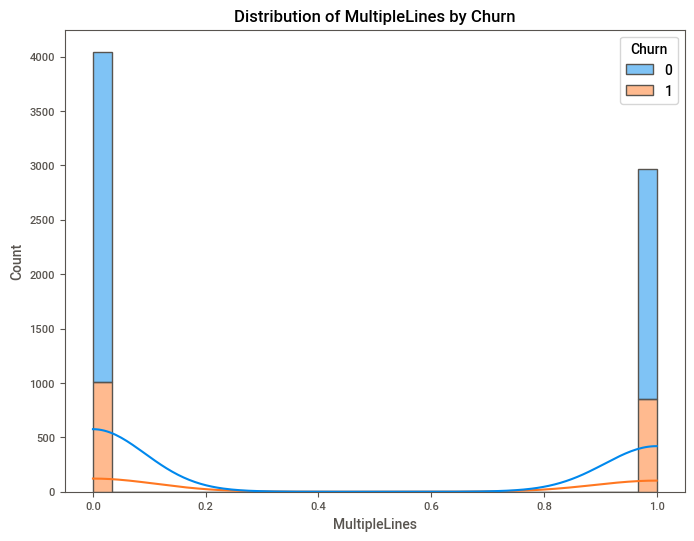

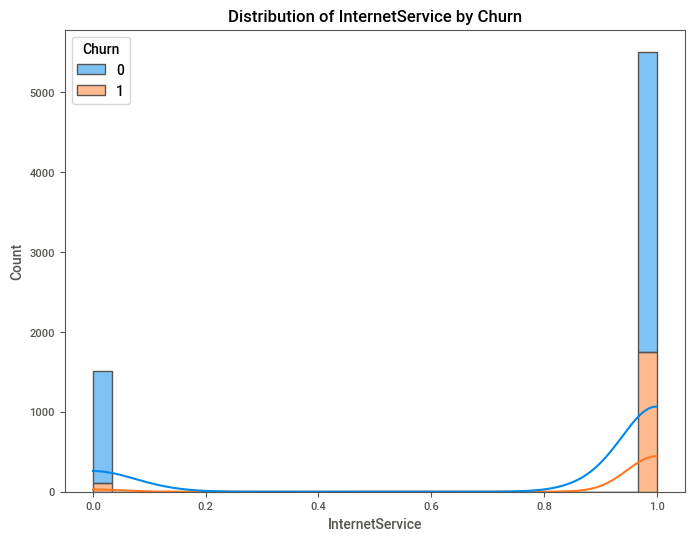

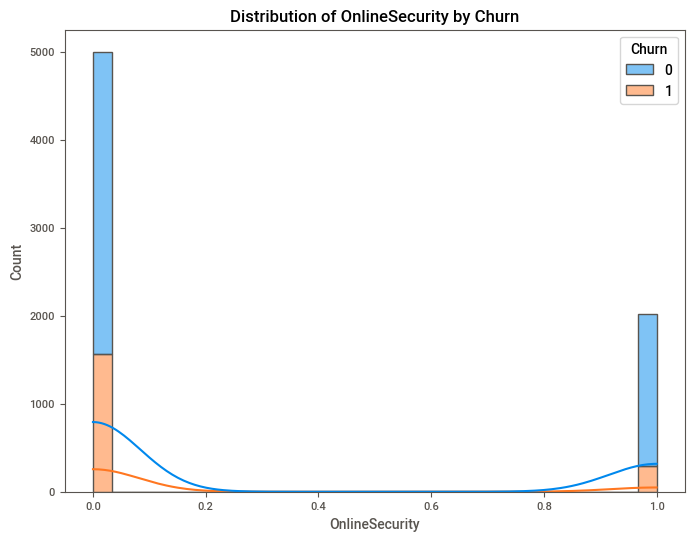

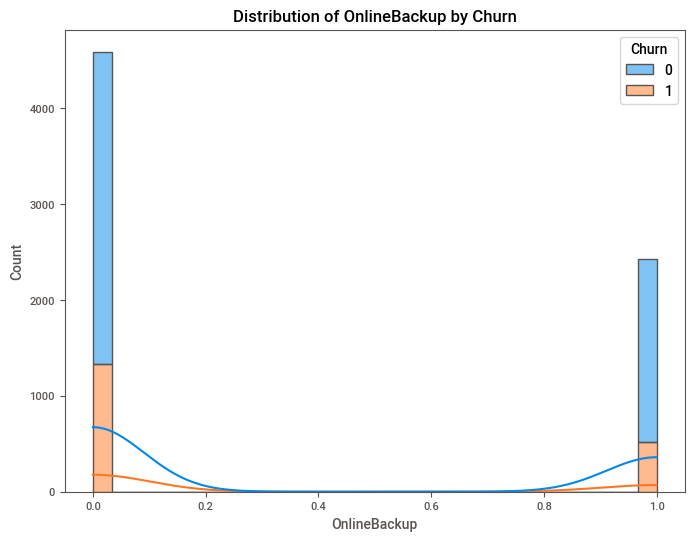

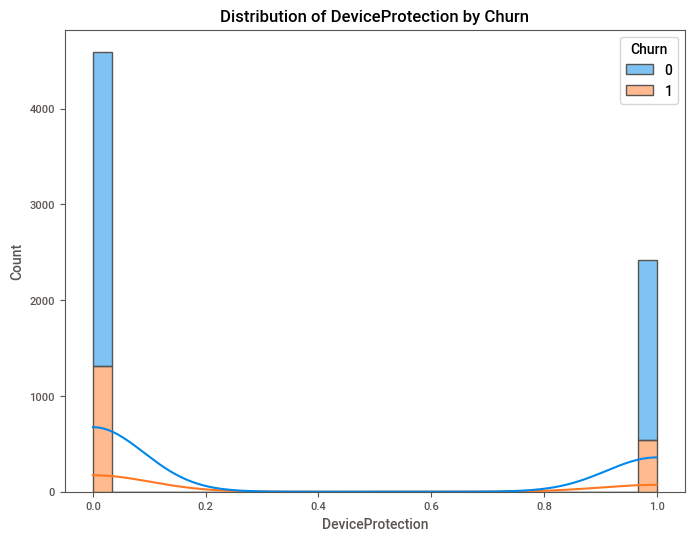

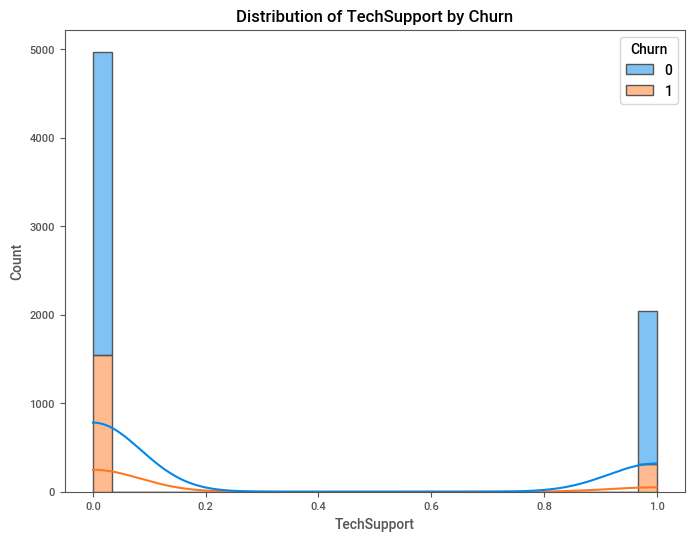

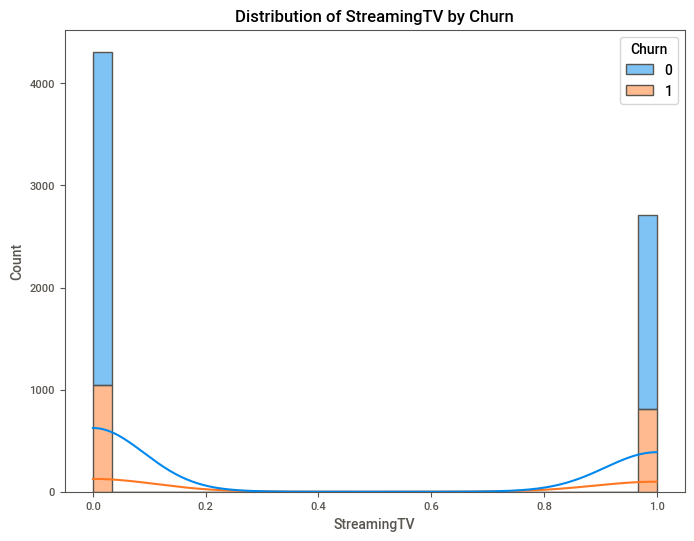

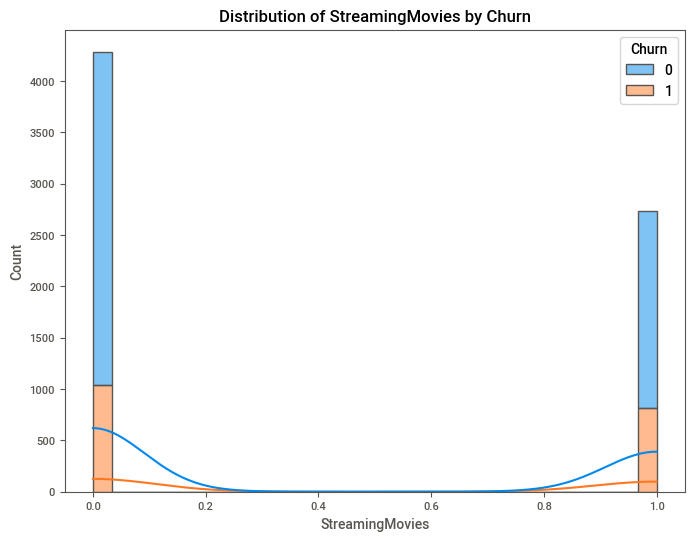

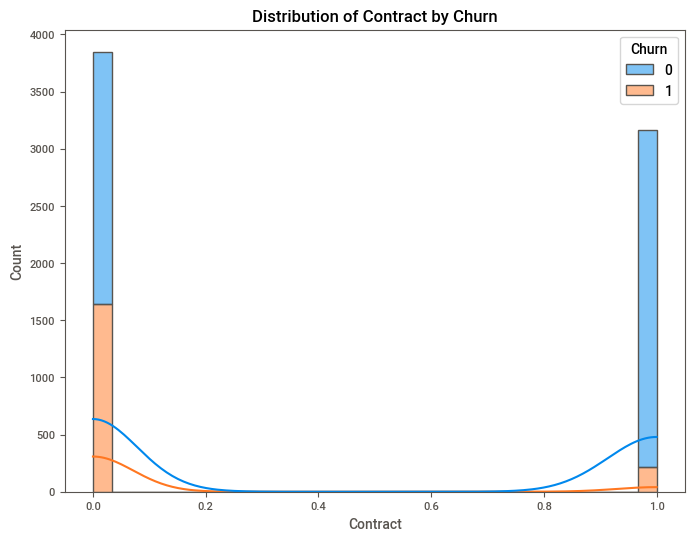

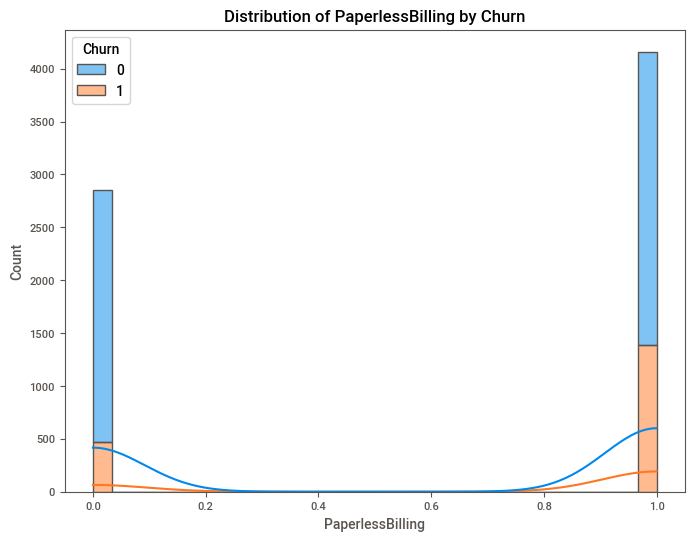

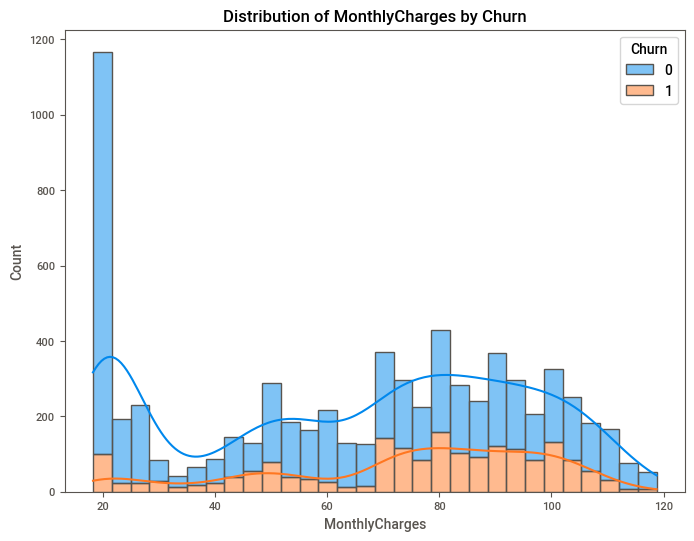

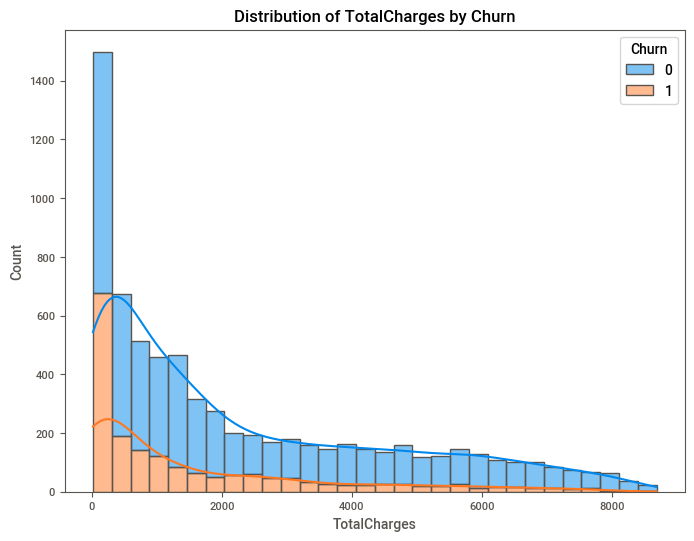

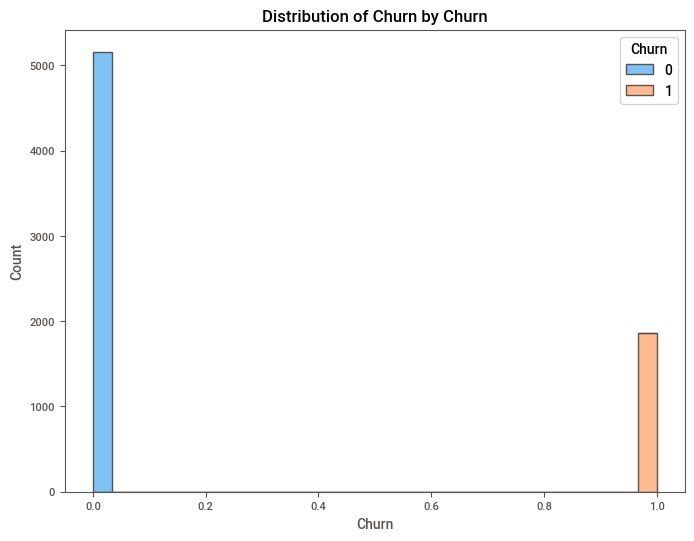

In [249]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_cleaned, x=col, hue='Churn', multiple='stack', kde=True, bins=30)
    plt.title(f"Distribution of {col} by Churn")
    plt.show()

In [250]:
!pip install scikit-learn

In [251]:
# Listing the Most Important Variables (Feature Importance)

from sklearn.ensemble import RandomForestClassifier


X = df_cleaned.drop('Churn', axis=1)
y = df_cleaned['Churn']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = model.feature_importances_

feature_importance = pd.Series(importances, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
 MonthlyCharges       0.210706
TotalCharges         0.209427
tenure               0.163070
Contract             0.079322
gender               0.030436
PaperlessBilling     0.027848
InternetService      0.026166
OnlineSecurity       0.024658
TechSupport          0.024488
Partner              0.023859
OnlineBackup         0.022155
SeniorCitizen        0.022098
DeviceProtection     0.020521
Dependents           0.020294
MultipleLines        0.020014
StreamingTV          0.018683
StreamingMovies      0.018234
AutomaticTransfer    0.016584
CheckTransfer        0.013651
PhoneService         0.007784
dtype: float64


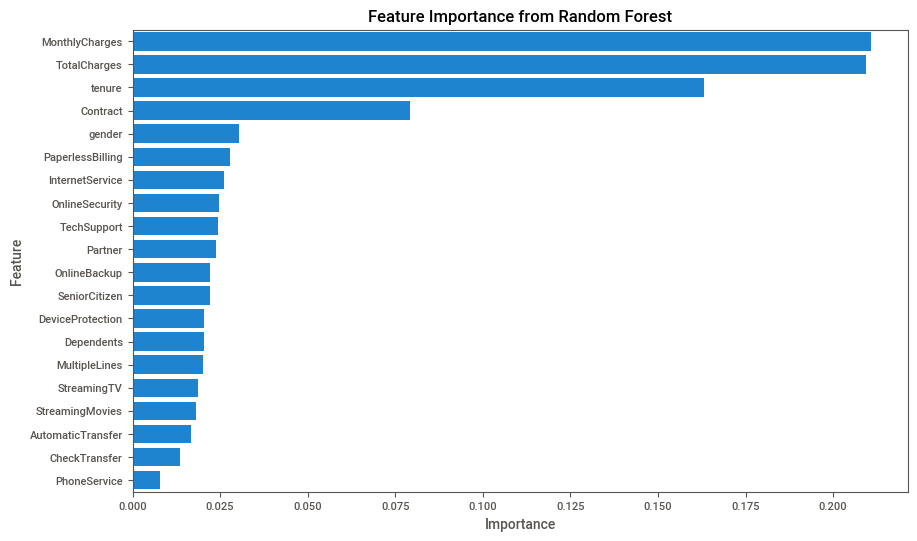

In [252]:
#horizontal bar plot of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

In [253]:
# Splitting the Dataset into Training and Test Sets (80/20) ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (5613, 20)
Testing Set Shape: (1404, 20)


In [254]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)


train_data['Dataset'] = 'Training'
test_data['Dataset'] = 'Testing'

# Combining both datasets
combined_data = pd.concat([train_data, test_data], axis=0)



In [255]:
# Profile Report
profile = ProfileReport(combined_data, title="Churn Dataset - Combined EDA Report", explorative=True)
profile.to_file("churn_combined_report.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [256]:
#Sweetviz report
report = sv.compare([train_data, "Training Data"], [test_data, "Testing Data"])
report.show_html("churn_sweetviz_report.html")

                                             |      | [  0%]   00:00 -> (? left)

Report churn_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [306]:
# original dataset after doing EDA and converting all features to Numeric
df1 = df
df1 = df1.drop_duplicates()
df1  #used for SMOTE dataset

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0                 0                1               0             1  ...   
1                 0                1               1             0  ...   
2                 0                1               1             1  ...   
3                 0                1               1             0  ...   
4                 0                1               0             0  ...   
...             ...              ...             ...           ...  ...   
7038              1                1               1             0  ...   
7039              1                1               0             1  ...   
7040              0                1               1             0  ...   
7041              1                1               0             0  ...   
7042              0                1               1             0  ...   

      TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0               0            0                0         0                 1   
1               0            0                0         1                 0   
2               0            0                0         0                 1   
3               1            0                0         1                 0   
4               0            0                0         0                 1   
...           ...          ...              ...       ...               ...   
7038            1            1                1         1                 1   
7039            0            1                1         1                 1   
7040            0            0                0         0                 1   
7041            0            0                0         0                 1   
7042            1            1                1         1                 1   

      MonthlyCharges  TotalCharges  Churn  AutomaticTransfer  CheckTransfer  
0              29.85         29.85      0              False           True  
1              56.95       1889.50      0              False           True  
2              53.85        108.15      1              False           True  
3              42.30       1840.75      0               True          False  
4              70.70        151.65      1              False           True  
...              ...           ...    ...                ...            ...  
7038           84.80       1990.50      0              False           True  
7039          103.20       7362.90      0               True          False  
7040           29.60        346.45      0              False           True  
7041           74.40        306.60      1              False           True  
7042          105.65       6844.50      0               True          False  

[7017 rows x 21 columns]

# Prepared original dataset for model training #

In [307]:
df2 = df1
df2 

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0                 0                1               0             1  ...   
1                 0                1               1             0  ...   
2                 0                1               1             1  ...   
3                 0                1               1             0  ...   
4                 0                1               0             0  ...   
...             ...              ...             ...           ...  ...   
7038              1                1               1             0  ...   
7039              1                1               0             1  ...   
7040              0                1               1             0  ...   
7041              1                1               0             0  ...   
7042              0                1               1             0  ...   

      TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0               0            0                0         0                 1   
1               0            0                0         1                 0   
2               0            0                0         0                 1   
3               1            0                0         1                 0   
4               0            0                0         0                 1   
...           ...          ...              ...       ...               ...   
7038            1            1                1         1                 1   
7039            0            1                1         1                 1   
7040            0            0                0         0                 1   
7041            0            0                0         0                 1   
7042            1            1                1         1                 1   

      MonthlyCharges  TotalCharges  Churn  AutomaticTransfer  CheckTransfer  
0              29.85         29.85      0              False           True  
1              56.95       1889.50      0              False           True  
2              53.85        108.15      1              False           True  
3              42.30       1840.75      0               True          False  
4              70.70        151.65      1              False           True  
...              ...           ...    ...                ...            ...  
7038           84.80       1990.50      0              False           True  
7039          103.20       7362.90      0               True          False  
7040           29.60        346.45      0              False           True  
7041           74.40        306.60      1              False           True  
7042          105.65       6844.50      0               True          False  

[7017 rows x 21 columns]

In [308]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

X2 = df2.drop('Churn', axis=1)
y2 = df2['Churn']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X2_train_scaled, y2_train)

y_pred_logistic = logistic_model.predict(X2_test_scaled)

print("Logistic Regression Classification Report:")
print(classification_report(y2_test, y_pred_logistic))
print(f"Accuracy: {accuracy_score(y2_test, y_pred_logistic) * 100:.2f}%")



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1035
           1       0.69      0.57      0.62       369

    accuracy                           0.82      1404
   macro avg       0.77      0.74      0.75      1404
weighted avg       0.81      0.82      0.81      1404

Accuracy: 82.05%


In [309]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X2_train_scaled, y2_train)

y_pred_rf = rf_model.predict(X2_test_scaled)

print("Random Forest Classification Report:")
print(classification_report(y2_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y2_test, y_pred_rf) * 100:.2f}%")


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.65      0.49      0.56       369

    accuracy                           0.80      1404
   macro avg       0.74      0.70      0.71      1404
weighted avg       0.78      0.80      0.79      1404

Accuracy: 79.56%


In [310]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X2_train_scaled, y2_train)

y_pred_nb = nb_model.predict(X2_test_scaled)

print("Naive Bayes Classification Report:")
print(classification_report(y2_test, y_pred_nb))
print(f"Accuracy: {accuracy_score(y2_test, y_pred_nb) * 100:.2f}%")


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1035
           1       0.54      0.76      0.63       369

    accuracy                           0.77      1404
   macro avg       0.72      0.76      0.73      1404
weighted avg       0.81      0.77      0.78      1404

Accuracy: 76.57%


In [311]:
!pip install xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X2_train, y2_train)  

y_pred_xgb = xgb_model.predict(X2_test)

print("XGBoost Classification Report:")
print(classification_report(y2_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y2_test, y_pred_xgb) * 100:.2f}%")


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1035
           1       0.60      0.51      0.55       369

    accuracy                           0.78      1404
   macro avg       0.72      0.70      0.71      1404
weighted avg       0.77      0.78      0.78      1404

Accuracy: 78.35%


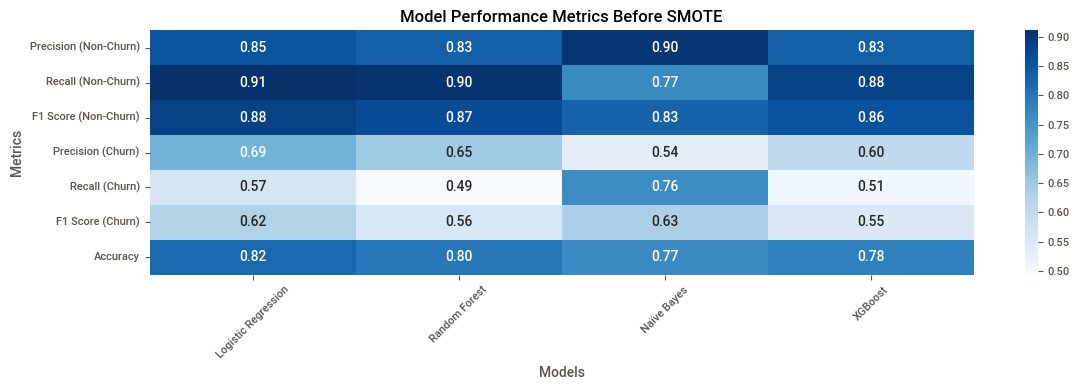

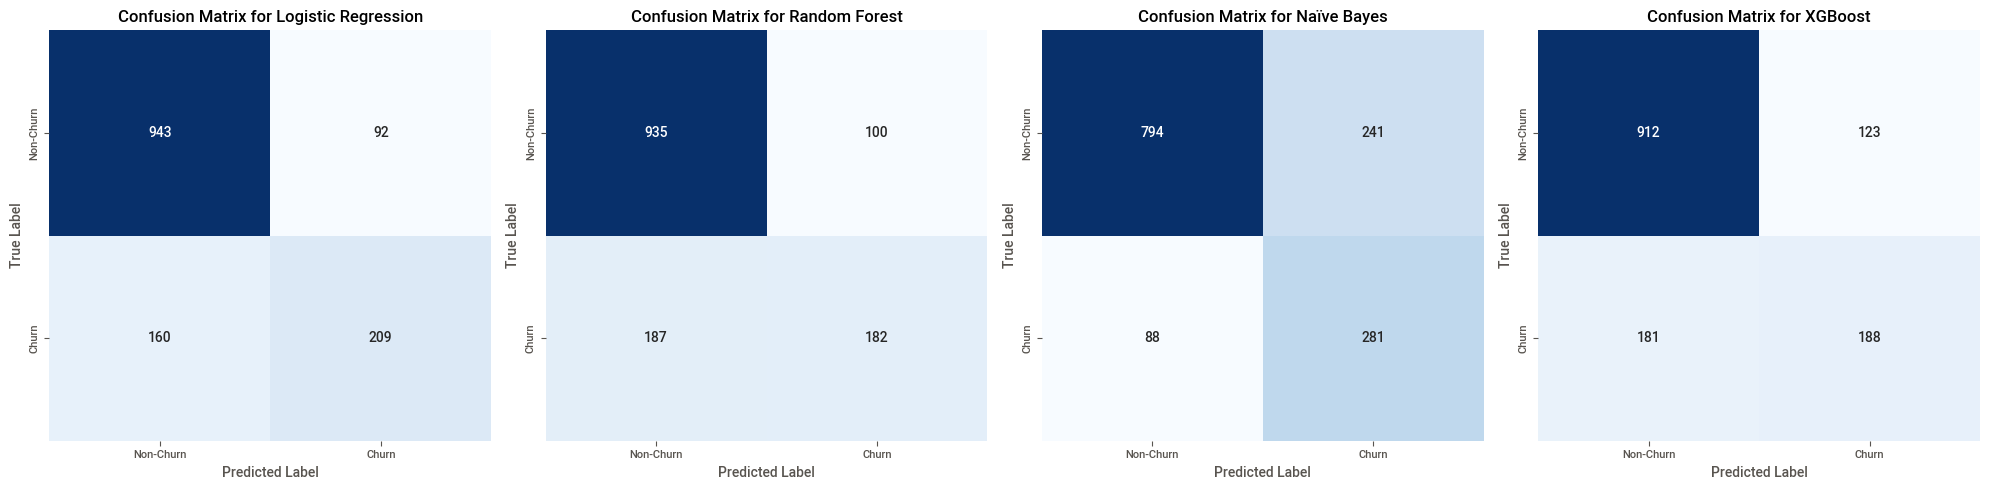

In [312]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression Evaluation
logistic_report = classification_report(y2_test, y_pred_logistic, output_dict=True)
logistic_accuracy = accuracy_score(y2_test, y_pred_logistic)

# Random Forest Evaluation
rf_report = classification_report(y2_test, y_pred_rf, output_dict=True)
rf_accuracy = accuracy_score(y2_test, y_pred_rf)

# Naive Bayes Evaluation
nb_report = classification_report(y2_test, y_pred_nb, output_dict=True)
nb_accuracy = accuracy_score(y2_test, y_pred_nb)

# XGBoost Evaluation
xgb_report = classification_report(y2_test, y_pred_xgb, output_dict=True)
xgb_accuracy = accuracy_score(y2_test, y_pred_xgb)

models_results = [
    ("Logistic Regression", y_pred_logistic, logistic_report, logistic_accuracy),
    ("Random Forest", y_pred_rf, rf_report, rf_accuracy),
    ("Naïve Bayes", y_pred_nb, nb_report, nb_accuracy),
    ("XGBoost", y_pred_xgb, xgb_report, xgb_accuracy)
]

comparison_data = {
    "Model": [],
    "Precision (Non-Churn)": [],
    "Recall (Non-Churn)": [],
    "F1 Score (Non-Churn)": [],
    "Precision (Churn)": [],
    "Recall (Churn)": [],
    "F1 Score (Churn)": [],
    "Accuracy": []
}

for model_name, y_pred, report, accuracy in models_results:
    comparison_data["Model"].append(model_name)
    comparison_data["Precision (Non-Churn)"].append(report['0']['precision'])
    comparison_data["Recall (Non-Churn)"].append(report['0']['recall'])
    comparison_data["F1 Score (Non-Churn)"].append(report['0']['f1-score'])
    comparison_data["Precision (Churn)"].append(report['1']['precision'])
    comparison_data["Recall (Churn)"].append(report['1']['recall'])
    comparison_data["F1 Score (Churn)"].append(report['1']['f1-score'])
    comparison_data["Accuracy"].append(accuracy)

comparison_df = pd.DataFrame(comparison_data)

plt.figure(figsize=(12, 4))
sns.heatmap(comparison_df.set_index('Model').T, annot=True, fmt=".2f", cmap='Blues', cbar=True)
plt.title('Model Performance Metrics Before SMOTE')
plt.ylabel('Metrics')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for ax, (model_name, y_pred, _, _) in zip(axes, models_results):
    cm = confusion_matrix(y2_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', cbar=False,
                xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_ylim(2, 0)  

plt.tight_layout()
plt.show()



# Further preprocessing on the dataset

In [313]:
 #  Dropping Low-Importance Features
low_importance_features = ['PhoneService', 'CheckTransfer', 'AutomaticTransfer', 'StreamingMovies', 'StreamingTV']
df1_reduced = df1.drop(columns=low_importance_features)
df1_reduced.head(3)

gender  SeniorCitizen  Partner  Dependents  tenure  MultipleLines  \
0       0              0        1           0       1              0   
1       1              0        0           0      34              0   
2       1              0        0           0       2              0   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                1               0             1                 0   
1                1               1             0                 1   
2                1               1             1                 0   

   TechSupport  Contract  PaperlessBilling  MonthlyCharges  TotalCharges  \
0            0         0                 1           29.85         29.85   
1            0         1                 0           56.95       1889.50   
2            0         0                 1           53.85        108.15   

   Churn  
0      0  
1      0  
2      1

In [314]:
# Creating some Interaction Features
# Avoiding division by zero by adding a small number (1e-5) to the denominator where needed
df1_reduced['MonthlyCharges_TotalCharges_Ratio'] = df1_reduced['MonthlyCharges'] / (df1_reduced['TotalCharges'] + 1e-5)
df1_reduced['MonthlyCharges_tenure'] = df1_reduced['MonthlyCharges'] * df1_reduced['tenure']
df1_reduced['Contract_tenure'] = df1_reduced['Contract'] * df1_reduced['tenure']
df1_reduced.head(5)

gender  SeniorCitizen  Partner  Dependents  tenure  MultipleLines  \
0       0              0        1           0       1              0   
1       1              0        0           0      34              0   
2       1              0        0           0       2              0   
3       1              0        0           0      45              0   
4       0              0        0           0       2              0   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                1               0             1                 0   
1                1               1             0                 1   
2                1               1             1                 0   
3                1               1             0                 1   
4                1               0             0                 0   

   TechSupport  Contract  PaperlessBilling  MonthlyCharges  TotalCharges  \
0            0         0                 1           29.85         29.85   
1            0         1                 0           56.95       1889.50   
2            0         0                 1           53.85        108.15   
3            1         1                 0           42.30       1840.75   
4            0         0                 1           70.70        151.65   

   Churn  MonthlyCharges_TotalCharges_Ratio  MonthlyCharges_tenure  \
0      0                           1.000000                  29.85   
1      0                           0.030140                1936.30   
2      1                           0.497920                 107.70   
3      0                           0.022980                1903.50   
4      1                           0.466205                 141.40   

   Contract_tenure  
0                0  
1               34  
2                0  
3               45  
4                0

In [315]:
X1 = df1_reduced.drop(columns=['Churn'])  
y1 = df1_reduced['Churn']

In [316]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y)

In [317]:
#Checking the class distribution in training set
print("Class Distribution in Training Set:")
print(y1_train.value_counts(normalize=True))

# Checking class distribution in testing set
print("\nClass Distribution in Testing Set:")
print(y1_test.value_counts(normalize=True))


Class Distribution in Training Set:
Churn
0    0.735436
1    0.264564
Name: proportion, dtype: float64

Class Distribution in Testing Set:
Churn
0    0.735755
1    0.264245
Name: proportion, dtype: float64


In [318]:
# Scaling the Important Features
from sklearn.preprocessing import StandardScaler
numeric_features = ['MonthlyCharges', 'TotalCharges', 'tenure',
                    'MonthlyCharges_TotalCharges_Ratio', 'MonthlyCharges_tenure', 'Contract_tenure']
scaler = StandardScaler()
X1_train[numeric_features] = scaler.fit_transform(X1_train[numeric_features])
X1_test[numeric_features] = scaler.transform(X1_test[numeric_features])

In [319]:
# Implementing SMOTE
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [320]:
# Initializing and Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X1_train, y1_train)
print("Before SMOTE:")
print(y1_train.value_counts())
print("After SMOTE:")
print(y_resampled.value_counts())

Before SMOTE:
Churn
0    4128
1    1485
Name: count, dtype: int64
After SMOTE:
Churn
0    4128
1    4128
Name: count, dtype: int64


In [321]:
# Training the Naïve Bayes model and Make predictions on the test set after applying SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
nb_model = GaussianNB()
nb_model.fit(X_resampled, y_resampled)
y_pred_nb = nb_model.predict(X1_test)
print("Naïve Bayes Model Evaluation:")
print(confusion_matrix(y1_test, y_pred_nb))
print(classification_report(y1_test, y_pred_nb))

Naïve Bayes Model Evaluation:
[[714 319]
 [ 76 295]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.80      0.60       371

    accuracy                           0.72      1404
   macro avg       0.69      0.74      0.69      1404
weighted avg       0.79      0.72      0.73      1404



In [322]:
# Training the Logistic Regression model and Make predictions on the test set after applying SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
import warnings

# Suppressing ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

X_resampled_lr = np.nan_to_num(X_resampled, nan=0.0, posinf=0.0, neginf=0.0)
if np.any(np.isnan(X_resampled_lr)) or np.any(np.isinf(X_resampled_lr)):
    print("There are still NaN or infinite values in your data!")
else:
    scaler = StandardScaler()
    X_resampled_scaled = scaler.fit_transform(X_resampled_lr)  
    X1_test_scaled = scaler.transform(X1_test) 
    lr_model = LogisticRegression(max_iter=1000, solver='lbfgs', C=1.0)  # C is the regularization parameter
    lr_model.fit(X_resampled_scaled, y_resampled)
    y_pred_lr = lr_model.predict(X1_test_scaled)
    print("Logistic Regression Model Evaluation After SMOTE:")
    print(confusion_matrix(y1_test, y_pred_lr))
    print(classification_report(y1_test, y_pred_lr))


Logistic Regression Model Evaluation After SMOTE:
[[751 282]
 [ 84 287]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1033
           1       0.50      0.77      0.61       371

    accuracy                           0.74      1404
   macro avg       0.70      0.75      0.71      1404
weighted avg       0.80      0.74      0.75      1404



/Users/farhana/anaconda3/envs/project1_churn_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [323]:
# Train the Random Forest model using the resampled training data and making predictions on the test data
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42,
                                 n_estimators= 300,
                                 max_depth= 10,
                                 min_samples_split= 2,
                                 min_samples_leaf=1)
rf_model.fit(X_resampled, y_resampled)
y_pred_rf = rf_model.predict(X1_test)

print("Random Forest Model Evaluation After SMOTE:")
print(confusion_matrix(y1_test, y_pred_rf))
print(classification_report(y1_test, y_pred_rf))

Random Forest Model Evaluation After SMOTE:
[[764 269]
 [ 92 279]]
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1033
           1       0.51      0.75      0.61       371

    accuracy                           0.74      1404
   macro avg       0.70      0.75      0.71      1404
weighted avg       0.79      0.74      0.76      1404



In [324]:
# Train the XGBoost model using the resampled training data and making predictions on the test data
!pip install xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_resampled, y_resampled)
y_pred_xgb = xgb_model.predict(X1_test)

print("XGBoost Model Evaluation After SMOTE:")
print(confusion_matrix(y1_test, y_pred_xgb))
print(classification_report(y1_test, y_pred_xgb))

XGBoost Model Evaluation After SMOTE:
[[788 245]
 [121 250]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1033
           1       0.51      0.67      0.58       371

    accuracy                           0.74      1404
   macro avg       0.69      0.72      0.69      1404
weighted avg       0.77      0.74      0.75      1404



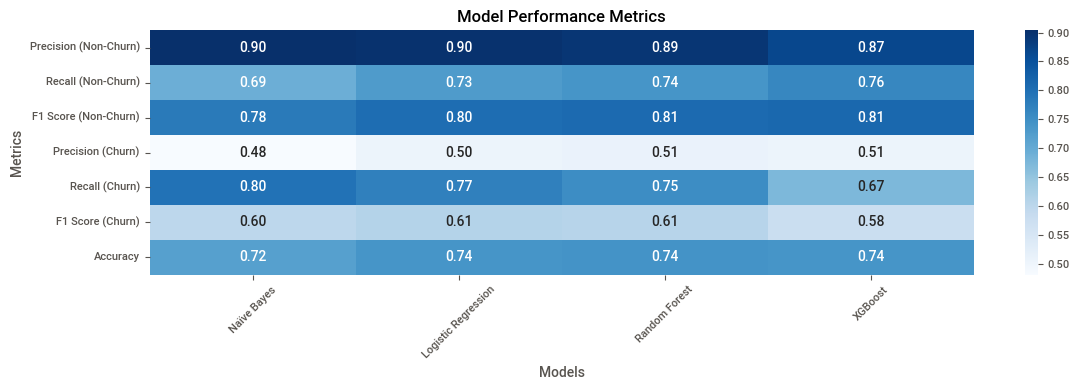

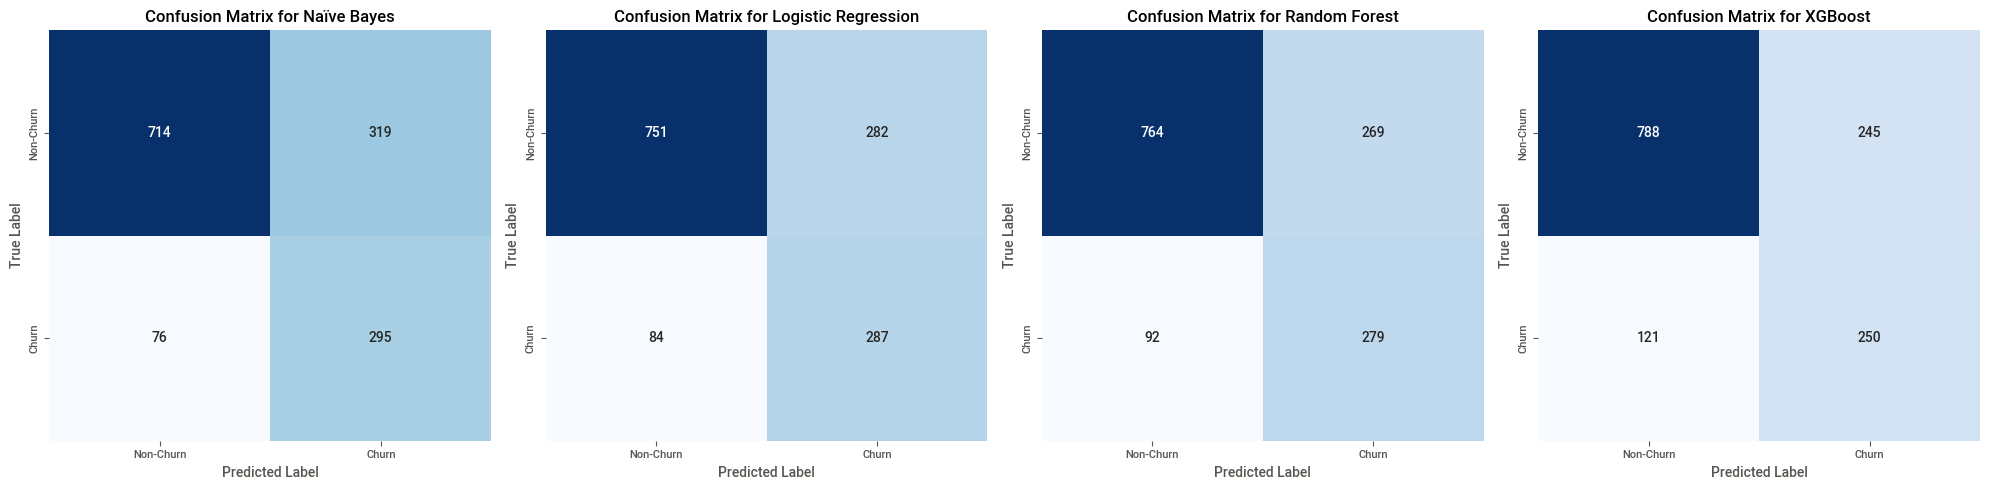

In [325]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

models_results = [
    ("Naïve Bayes", y_pred_nb),
    ("Logistic Regression", y_pred_lr),
    ("Random Forest", y_pred_rf),
    ("XGBoost", y_pred_xgb)
]

comparison_data = {
    "Model": [],
    "Precision (Non-Churn)": [],
    "Recall (Non-Churn)": [],
    "F1 Score (Non-Churn)": [],
    "Precision (Churn)": [],
    "Recall (Churn)": [],
    "F1 Score (Churn)": [],
    "Accuracy": []
}

for model_name, y_pred in models_results:
    report = classification_report(y1_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y1_test, y_pred)
    
    comparison_data["Model"].append(model_name)
    comparison_data["Precision (Non-Churn)"].append(report['0']['precision'])
    comparison_data["Recall (Non-Churn)"].append(report['0']['recall'])
    comparison_data["F1 Score (Non-Churn)"].append(report['0']['f1-score'])
    comparison_data["Precision (Churn)"].append(report['1']['precision'])
    comparison_data["Recall (Churn)"].append(report['1']['recall'])
    comparison_data["F1 Score (Churn)"].append(report['1']['f1-score'])
    comparison_data["Accuracy"].append(accuracy)

comparison_df = pd.DataFrame(comparison_data)

plt.figure(figsize=(12, 4))
sns.heatmap(comparison_df.set_index('Model').T, annot=True, fmt=".2f", cmap='Blues', cbar=True)
plt.title('Model Performance Metrics')
plt.ylabel('Metrics')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for ax, (model_name, y_pred) in zip(axes, models_results):
    cm = confusion_matrix(y1_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', cbar=False,
                xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_ylim(2, 0) 

plt.tight_layout()
plt.show()


# Hyperparameter Tuning #

Cross-Validation Results:
Mean Accuracy: 0.81 ± 0.02
Mean F1 Score: 0.82 ± 0.02
Mean ROC AUC Score: 0.89 ± 0.02
Random Forest Model Evaluation After SMOTE:
[[791 242]
 [104 267]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1033
           1       0.52      0.72      0.61       371

    accuracy                           0.75      1404
   macro avg       0.70      0.74      0.71      1404
weighted avg       0.79      0.75      0.76      1404

ROC AUC Score: 0.83


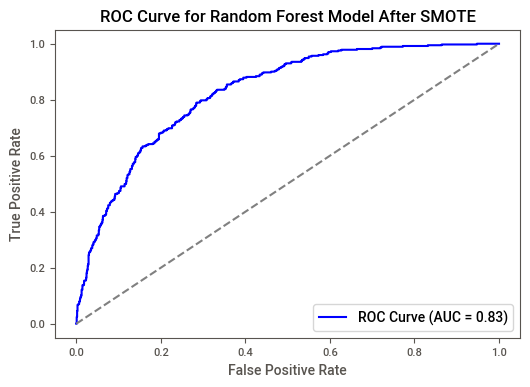

In [326]:
# Initializing the Random Forest model with adjustments
# Parameters tuned : n_estimators=1000, max_depth=15, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', class_weight='balanced'.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import roc_curve, auc

rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=1000,  
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt', 
    class_weight='balanced'
)

cv_results = cross_validate(rf_model, X_resampled, y_resampled, 
                             cv=5, 
                             scoring=['accuracy', 'f1', 'roc_auc'], 
                             return_train_score=False)

print("Cross-Validation Results:")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")
print(f"Mean ROC AUC Score: {cv_results['test_roc_auc'].mean():.2f} ± {cv_results['test_roc_auc'].std():.2f}")

rf_model.fit(X_resampled, y_resampled)
y_pred_rf = rf_model.predict(X1_test)
y_probs_rf = rf_model.predict_proba(X1_test)[:, 1]  

print("Random Forest Model Evaluation After SMOTE:")
conf_matrix = confusion_matrix(y1_test, y_pred_rf)
print(conf_matrix)
print(classification_report(y1_test, y_pred_rf))

roc_auc = roc_auc_score(y1_test, y_probs_rf)
print(f"ROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y1_test, y_probs_rf)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model After SMOTE')
plt.legend(loc="lower right")
plt.show()


Cross-Validation Scores for the Best Logistic Regression Model:
Mean Accuracy: 0.78
Mean F1 Score: 0.78
Mean ROC AUC Score: 0.86
Logistic Regression Model Evaluation:
[[745 288]
 [ 81 290]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.78      0.61       371

    accuracy                           0.74      1404
   macro avg       0.70      0.75      0.71      1404
weighted avg       0.80      0.74      0.75      1404

ROC AUC Score: 0.83


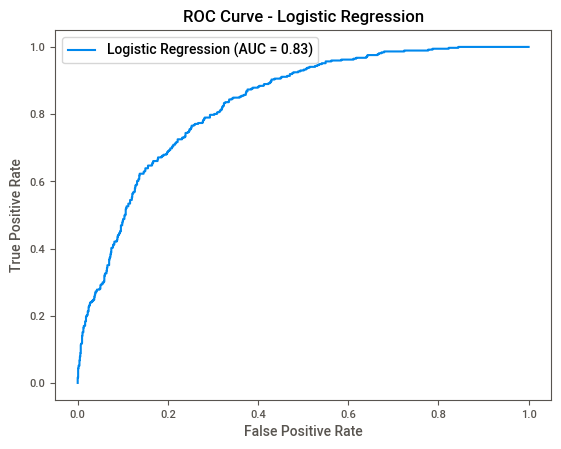

In [327]:
# Parameters Tuned for Logistic Regression Model: C, penalty, solver, max_iter.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

param_grid = {
    'C': [0.1, 1, 10, 100],     
    'penalty': ['l1', 'l2'],    
    'solver': ['liblinear'],     
    'max_iter': [1000, 2000]    
}

log_reg = LogisticRegression(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(log_reg, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_resampled, y_resampled)

best_log_reg = grid_search.best_estimator_

cv_results = cross_validate(
    best_log_reg, X_resampled, y_resampled, cv=5,
    scoring=['accuracy', 'f1', 'roc_auc']
)

print("Cross-Validation Scores for the Best Logistic Regression Model:")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.2f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.2f}")
print(f"Mean ROC AUC Score: {cv_results['test_roc_auc'].mean():.2f}")

y_pred_lr = best_log_reg.predict(X1_test)
y_probs_lr = best_log_reg.predict_proba(X1_test)[:, 1]

print("Logistic Regression Model Evaluation:")
print(confusion_matrix(y1_test, y_pred_lr))
print(classification_report(y1_test, y_pred_lr))

roc_auc_lr = roc_auc_score(y1_test, y_probs_lr)
print(f"ROC AUC Score: {roc_auc_lr:.2f}")

fpr, tpr, _ = roc_curve(y1_test, y_probs_lr)
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_lr))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


Cross-Validation Scores for the Best Naive Bayes Model:
Mean Accuracy: 0.77
Mean F1 Score: 0.78
Mean ROC AUC Score: 0.83
Naive Bayes Model Evaluation:
[[714 319]
 [ 76 295]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.80      0.60       371

    accuracy                           0.72      1404
   macro avg       0.69      0.74      0.69      1404
weighted avg       0.79      0.72      0.73      1404

ROC AUC Score: 0.81


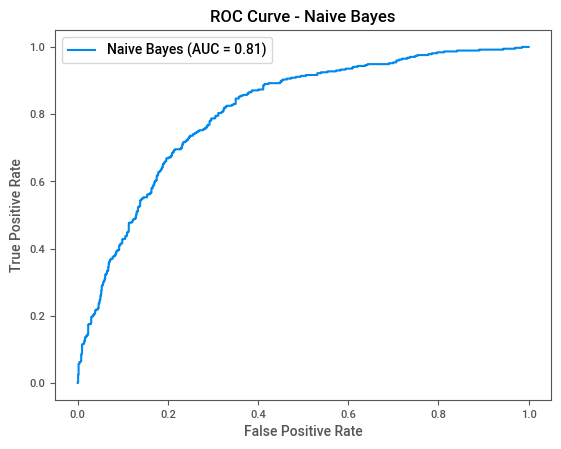

In [328]:
# Parameter Tuned for Naive Bayes Model: var_smoothing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score

nb_model = GaussianNB()

param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

grid_search_nb = GridSearchCV(nb_model, param_grid, scoring='roc_auc', cv=5)
grid_search_nb.fit(X_resampled, y_resampled)

best_nb = grid_search_nb.best_estimator_

cv_results_nb = cross_validate(
    best_nb, X_resampled, y_resampled, cv=5,
    scoring=['accuracy', 'f1', 'roc_auc']
)

print("Cross-Validation Scores for the Best Naive Bayes Model:")
print(f"Mean Accuracy: {cv_results_nb['test_accuracy'].mean():.2f}")
print(f"Mean F1 Score: {cv_results_nb['test_f1'].mean():.2f}")
print(f"Mean ROC AUC Score: {cv_results_nb['test_roc_auc'].mean():.2f}")

y_pred_nb = best_nb.predict(X1_test)
y_probs_nb = best_nb.predict_proba(X1_test)[:, 1]

print("Naive Bayes Model Evaluation:")
print(confusion_matrix(y1_test, y_pred_nb))
print(classification_report(y1_test, y_pred_nb))

roc_auc_nb = roc_auc_score(y1_test, y_probs_nb)
print(f"ROC AUC Score: {roc_auc_nb:.2f}")

fpr, tpr, _ = roc_curve(y1_test, y_probs_nb)
plt.plot(fpr, tpr, label="Naive Bayes (AUC = {:.2f})".format(roc_auc_nb))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes")
plt.legend()
plt.show()


Cross-Validation Scores for the Best XGBoost Model:
Mean Accuracy: 0.81
Mean F1 Score: 0.83
Mean ROC AUC Score: 0.90
XGBoost Model Evaluation:
[[693 340]
 [ 70 301]]
              precision    recall  f1-score   support

           0       0.91      0.67      0.77      1033
           1       0.47      0.81      0.59       371

    accuracy                           0.71      1404
   macro avg       0.69      0.74      0.68      1404
weighted avg       0.79      0.71      0.72      1404

ROC AUC Score: 0.82


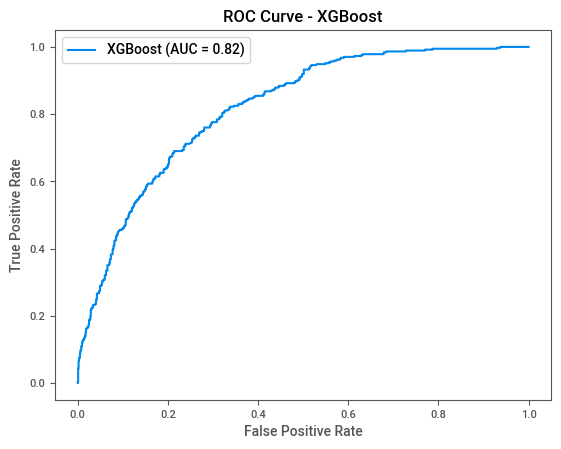

In [329]:
# Parameters Tuned for XGBoost : n_estimators, max_depth, learning_rate, subsample, colsample_bytree, scale_pos_weight.
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 3, 5] 
}

xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
random_search_xgb = RandomizedSearchCV(xgb_model, param_grid, scoring='roc_auc', cv=5, n_iter=20, random_state=42)
random_search_xgb.fit(X_resampled, y_resampled)

best_xgb = random_search_xgb.best_estimator_

cv_results_xgb = cross_validate(
    best_xgb, X_resampled, y_resampled, cv=5,
    scoring=['accuracy', 'f1', 'roc_auc']
)

print("Cross-Validation Scores for the Best XGBoost Model:")
print(f"Mean Accuracy: {cv_results_xgb['test_accuracy'].mean():.2f}")
print(f"Mean F1 Score: {cv_results_xgb['test_f1'].mean():.2f}")
print(f"Mean ROC AUC Score: {cv_results_xgb['test_roc_auc'].mean():.2f}")

y_pred_xgb = best_xgb.predict(X1_test)
y_probs_xgb = best_xgb.predict_proba(X1_test)[:, 1]

print("XGBoost Model Evaluation:")
print(confusion_matrix(y1_test, y_pred_xgb))
print(classification_report(y1_test, y_pred_xgb))

roc_auc_xgb = roc_auc_score(y1_test, y_probs_xgb)
print(f"ROC AUC Score: {roc_auc_xgb:.2f}")

fpr, tpr, _ = roc_curve(y1_test, y_probs_xgb)
plt.plot(fpr, tpr, label="XGBoost (AUC = {:.2f})".format(roc_auc_xgb))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()


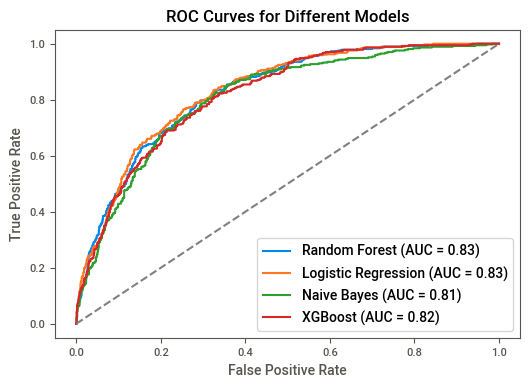

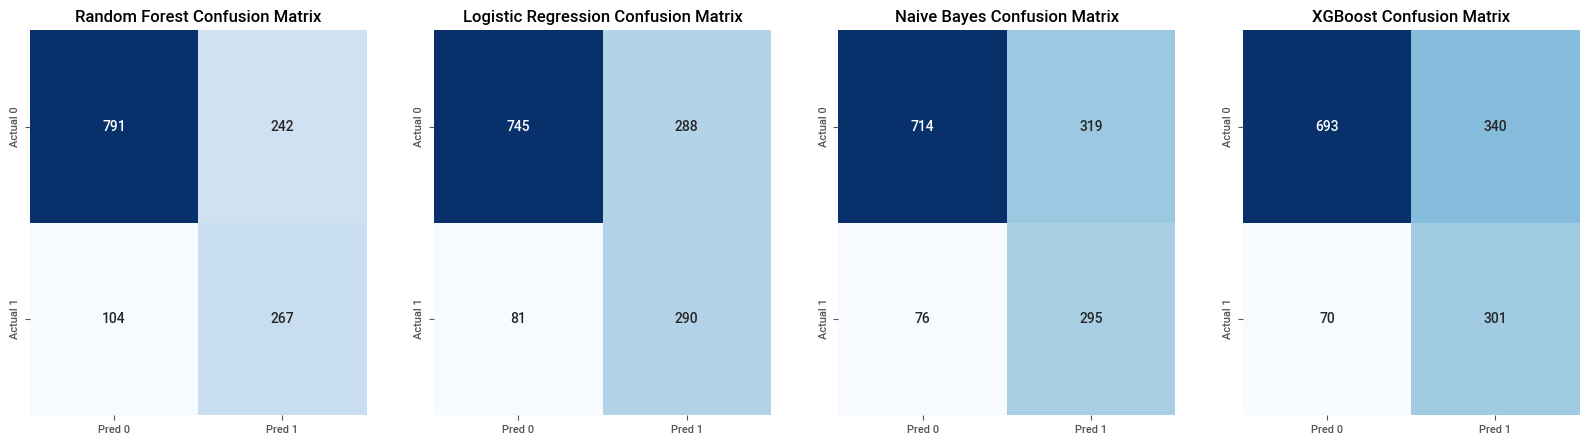

In [330]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

models = {
    "Random Forest": (y1_test, y_pred_rf, y_probs_rf, confusion_matrix(y1_test, y_pred_rf), 0.83),  # AUC from output
    "Logistic Regression": (y1_test, y_pred_lr, y_probs_lr, confusion_matrix(y1_test, y_pred_lr), 0.83),
    "Naive Bayes": (y1_test, y_pred_nb, y_probs_nb, confusion_matrix(y1_test, y_pred_nb), 0.81),
    "XGBoost": (y1_test, y_pred_xgb, y_probs_xgb, confusion_matrix(y1_test, y_pred_xgb), 0.82)
}

plt.figure(figsize=(6, 4))
for model_name, (y_true, y_pred, y_probs, _, roc_auc) in models.items():
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()

conf_matrices = []
metrics = []
for model_name, (y_true, y_pred, y_probs, conf_matrix, roc_auc) in models.items():
    conf_matrices.append(pd.DataFrame(conf_matrix, columns=["Pred 0", "Pred 1"], index=["Actual 0", "Actual 1"]))
    
    report = classification_report(y_true, y_pred, output_dict=True)
    metrics.append({
        "Model": model_name,
        "Accuracy": report['accuracy'],
        "Precision (0)": report['0']['precision'],
        "Recall (0)": report['0']['recall'],
        "F1 Score (0)": report['0']['f1-score'],
        "Precision (1)": report['1']['precision'],
        "Recall (1)": report['1']['recall'],
        "F1 Score (1)": report['1']['f1-score'],
        "ROC AUC": roc_auc
    })

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for idx, (model_name, matrix) in enumerate(zip(models.keys(), conf_matrices)):
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[idx])
    axes[idx].set_title(f"{model_name} Confusion Matrix")

metrics_df = pd.DataFrame(metrics).set_index("Model")
metrics_df_styled = metrics_df.style.background_gradient(cmap="YlGnBu").format("{:.2f}")
display(metrics_df_styled)
